In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
x_points = [0.163928, 0.53282, 3.00007, 11.2078, 26.7487, 47.3297, 76.8061]
y_points = [10, 20, 50, 100, 150, 200, 250]

def lagrange_pol(x_points, y_points, x):
    result = 0
    
    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(y_points)):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

In [36]:
x_range = np.linspace(0, 77, 500)
print(lagrange_pol(x_points, y_points, 30))

0.32757282614645106


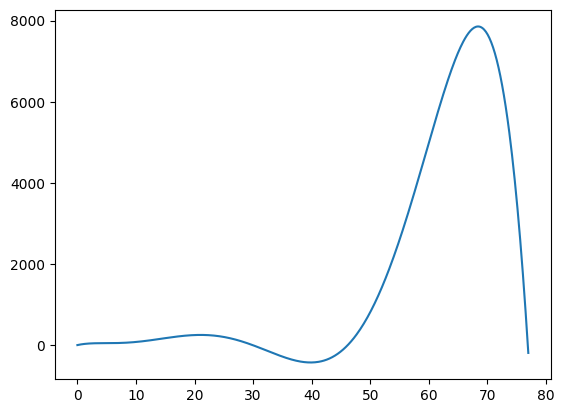

In [37]:
plt.plot(x_range, lagrange_pol(x_points, y_points, x_range))
plt.show()